In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from efficient_multilingual_continual_pretraining.constants import PROJECT_ROOT 

In [102]:
# All categories have 'big category ~ small category' syntax.
# Some "solutions" are not in fact solutions, for example:
#   Mit Gast besprochen, das wir die Reparatur fortsetzen, wenn ein neuer Schalter und Gummibänder zur Verfügung stehen.
#   (We will continue once the repair details arrive)
# Some "problems" also have parts of solutions, for example, the two of the longest (500+ characters) problems have
# something like "We did this, did this, and found out it is all about the capacitor. And the solution is to reinstall the capacitor.

In [13]:
df = pd.read_csv(PROJECT_ROOT / "data/OpenRepairData_v0.csv", encoding='iso-8859-1')
df['id'].nunique() == len(df)

True

In [14]:
df = df[['partner_product_category', 'Problem_refined', 'Solution_refined']]
df.head()

,partner_product_category,Problem_refined,Solution_refined
0,Computer ~ Laptop,Netzteilbuchse und Grafikkarte defekt,NaN
1,Haushaltsgeräte ~ Kaffeemaschine,"Fehlermeldungen, Motorgeräusch",NaN
2,Haushaltsgeräte ~ Bügeleisen,Bedienungsfehler.,Besitzerin eingewiesen
3,Haushaltsgeräte ~ Handrührgerät,Zahnrad gebrochen.,Besitzerin besorgt einen neuen Zahnradsatz
4,Unterhaltungselektronik ~ Kassettenrekorder,Kassette Wiedergabe geht nicht.,"Kassettenlaufwerk, Tonkopf, Wellen usw. gerein..."


In [15]:
original_size = len(df)
df = df.dropna().reset_index(drop=True)
print(f'Dropped {original_size - len(df)} rows with NaN values, have {len(df)} entries remaining.')
df.columns = ['product_category', 'problem', 'solution']
df.head(10)

Dropped 4590 rows with NaN values, have 2603 entries remaining.


,product_category,problem,solution
0,Haushaltsgeräte ~ Bügeleisen,Bedienungsfehler.,Besitzerin eingewiesen
1,Haushaltsgeräte ~ Handrührgerät,Zahnrad gebrochen.,Besitzerin besorgt einen neuen Zahnradsatz
2,Unterhaltungselektronik ~ Kassettenrekorder,Kassette Wiedergabe geht nicht.,"Kassettenlaufwerk, Tonkopf, Wellen usw. gerein..."
3,Unterhaltungselektronik ~ Stereoanlage,geht alleine immer wieder aus; Kassettendeck B...,2 Elkos wurden gewechselt
4,Unterhaltungselektronik ~ CD-Radio,CD wird nicht abgespielt.Die CD lief nicht an.,Das Gerät wurde bis zum CD-Laufwerk demontiert...
5,Elektro divers ~ E-Auto,keine funktion,"Ladegerät getestet, neuer Bleiakku erforderlich"
6,Unterhaltungselektronik ~ Kassettenrekorder,Antrieb leiert,Riemen ausgetauscht
7,Smartphone/Tablet ~ Handy,kein Einschalten möglich,Sturzschaden durch Neumontage behoben
8,Unterhaltungselektronik ~ Stereoanlage,keine Funktion nach Stromabschaltung,Background-Led vom Display erneuert (gelbe LED!)
9,Haushaltsgeräte ~ Handrührgerät,Schraube fehlt,Schraube angepasst


In [16]:
df['product_category'].value_counts()

product_category
Haushaltsgeräte ~ Staubsauger          166
Elektro divers ~ Nähmaschine           127
Elektro divers ~ Lampe                  95
Computer ~ Laptop                       91
Unterhaltungselektronik ~ Radio         88
                                      ... 
Elektro divers ~ Motor                   1
Elektro divers ~ E-Gehrungssäge          1
Elektro divers ~ Inverter                1
Unterhaltungselektronik ~ Equalizer      1
Elektro divers ~ Laufband                1
Name: count, Length: 277, dtype: int64

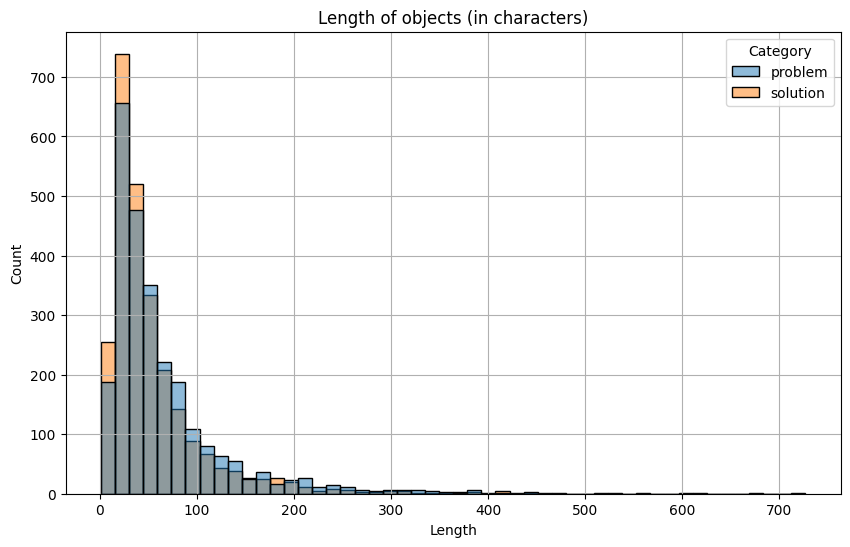

In [98]:
len_df = df[['problem', 'solution']]
for column in len_df.columns:
    len_df.loc[:, column] = len_df[column].apply(lambda x: len(x))

# Melt the DataFrame
melted_df = len_df.melt(value_vars=['problem', 'solution'], var_name='Category', value_name='Length')

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(data=melted_df, x='Length', hue='Category', bins=50)
plt.title('Length of objects (in characters)')
plt.grid()
plt.show()

In [101]:
df[len_df['problem'] > 500]

,product_category,problem,solution
2491,Haushaltsgeräte ~ Kaffeemaschine,"Sie lief nicht mehr so zuverlässig, wie früher...",Nach dem Austausch des Kondensators (die wir n...
2570,Elektro divers ~ Steuergerät,"Es funktionierte nicht mehr, d. h. der eingekl...",Der Besucher will im Internet Ersatzteile best...
